In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

from utils import api_requests as req
from utils import funciones as func

In [2]:
#Lo cargamos desde el fichero
df = pd.read_csv("../data/dataCards.csv")
#Lo miramos para ver que está bonito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106374 entries, 0 to 106373
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            106374 non-null  object 
 1   released_at     106374 non-null  object 
 2   layout          106374 non-null  object 
 3   mana_cost       87447 non-null   object 
 4   cmc             106299 non-null  float64
 5   type_line       106299 non-null  object 
 6   oracle_text     99669 non-null   object 
 7   colors          102815 non-null  object 
 8   color_identity  106374 non-null  object 
 9   keywords        106374 non-null  object 
 10  produced_mana   16226 non-null   object 
 11  legalities      106374 non-null  object 
 12  reserved        106374 non-null  bool   
 13  game_changer    106374 non-null  bool   
 14  foil            106374 non-null  bool   
 15  nonfoil         106374 non-null  bool   
 16  promo           106374 non-null  bool   
 17  reprint   

In [3]:
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,True,False,True,common,False,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,True,False,True,common,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106369,Celestine Reef,2009-09-30,planar,NaN,0.0,Plane — Luvion,Creatures without flying or islandwalk can't a...,[],[],[],...,True,True,True,rare,False,False,NaN,NaN,NaN,"{'usd': '1.89', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


## Antes de nada vamos a eliminar todas las que sean Token o tipos especiales raros

In [4]:
df = df.dropna(subset=['type_line'])

In [5]:
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,True,False,True,common,False,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,True,False,True,common,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106369,Celestine Reef,2009-09-30,planar,NaN,0.0,Plane — Luvion,Creatures without flying or islandwalk can't a...,[],[],[],...,True,True,True,rare,False,False,NaN,NaN,NaN,"{'usd': '1.89', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [6]:
df[df["type_line"].str.contains("Token")]

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
3,Spirit,2015-05-22,token,NaN,0.0,Token Creature — Spirit,Flying,['W'],['W'],['Flying'],...,True,False,True,common,False,True,1,1,NaN,"{'usd': '0.09', 'usd_foil': None, 'usd_etched'..."
36,Bird,2024-04-19,token,NaN,0.0,Token Creature — Bird,Flying,['U'],['U'],['Flying'],...,True,False,True,common,False,False,1,1,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
65,Wolf,2021-11-19,token,NaN,0.0,Token Creature — Wolf,NaN,['R'],['R'],[],...,True,False,False,common,False,False,3,2,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
162,Copy,2025-01-01,token,NaN,0.0,Token,(This token can be used to represent a token t...,[],[],[],...,True,False,True,common,False,False,NaN,NaN,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
168,Insect,2016-04-08,token,NaN,0.0,Token Creature — Insect,NaN,['G'],['G'],[],...,True,False,True,common,False,True,1,1,NaN,"{'usd': '0.18', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106008,Goblin,2014-12-05,token,NaN,0.0,Token Creature — Goblin,NaN,['R'],['R'],[],...,True,False,True,common,False,False,1,1,NaN,"{'usd': '0.28', 'usd_foil': None, 'usd_etched'..."
106026,Elf Warrior,2020-11-20,token,NaN,0.0,Token Creature — Elf Warrior,NaN,['G'],['G'],[],...,True,False,True,common,False,False,1,1,NaN,"{'usd': '0.30', 'usd_foil': None, 'usd_etched'..."
106121,Elemental,2023-09-08,token,NaN,0.0,Token Creature — Elemental,NaN,"['U', 'W']","['U', 'W']",[],...,True,False,False,common,False,False,4,4,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."
106200,Angel,2022-02-18,token,NaN,0.0,Token Creature — Angel,"Flying, vigilance",['W'],['W'],"['Flying', 'Vigilance']",...,True,False,True,common,False,False,4,4,NaN,"{'usd': None, 'usd_foil': None, 'usd_etched': ..."


In [7]:
df = df[~df["type_line"].str.contains("Token", na=False)]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,True,False,True,common,False,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,True,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106369,Celestine Reef,2009-09-30,planar,NaN,0.0,Plane — Luvion,Creatures without flying or islandwalk can't a...,[],[],[],...,True,True,True,rare,False,False,NaN,NaN,NaN,"{'usd': '1.89', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [8]:
106299 - 2535

103764

In [9]:
df = df[(df['layout'] != 'token')]
df = df[(df['layout'] != 'double_faced_token')]
df = df[(df['layout'] != 'art_series')]
df = df[(df['layout'] != 'planar')]
df = df[(df['layout'] != 'emblem')]
df = df[(df['layout'] != 'host')]
df = df[(df['layout'] != 'vanguard')]
df = df[(df['layout'] != 'scheme')]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
0,Forest,2024-08-02,normal,NaN,0.0,Basic Land — Forest,({T}: Add {G}.),[],['G'],[],...,True,False,True,common,False,True,NaN,NaN,NaN,"{'usd': '0.29', 'usd_foil': '0.74', 'usd_etche..."
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,True,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,True,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [10]:
#Vamos bien limpiando, sin tokens

## Ahora voy a expoliar las tierras básicas

In [11]:
tierras = df[df["type_line"].str.contains("Basic")]

In [12]:
tierras[~tierras["type_line"].str.contains("Land")]

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
21990,Omnipresent Impostor,2024-08-02,normal,{2},2.0,Basic Creature — Shapeshifter,Changeling\nOmnipresent Impostor has all card ...,[],[],['Changeling'],...,True,False,False,rare,False,False,2,1,NaN,"{'usd': '0.37', 'usd_foil': None, 'usd_etched'..."


In [13]:
#De esta carta podemos prescindir, no aporta nada

In [14]:
100577 - 4453

96124

In [15]:
df = df[~df["type_line"].str.contains("Basic", na=False)]
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,True,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
6,Wastewood Verge,2025-02-14,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],...,True,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,True,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


In [16]:
#Vamos a quitar los stickers
df = df[~df["type_line"].str.contains("Stickers", na=False)]
df = df[~df["type_line"].str.contains("Conspiracy", na=False)]
df = df[~df["type_line"].str.contains("Summon", na=False)]
df = df[~df["type_line"].str.contains("Tribal", na=False)]
df = df[df['name'] != 'Atinlay Igpay']
df = df[df['type_line'] != 'Card']
df

,name,released_at,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,...,nonfoil,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices
1,Fury Sliver,2006-10-06,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],...,True,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche..."
2,Kor Outfitter,2009-10-02,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],...,True,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche..."
4,Siren Lookout,2017-09-29,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",...,True,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche..."
5,Web,1994-04-11,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],...,True,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'..."
6,Wastewood Verge,2025-02-14,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],...,True,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,2024-06-14,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],...,True,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'..."
106370,Horned Troll,2003-07-28,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],...,True,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'..."
106371,Faerie Bladecrafter,2023-09-08,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],...,True,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'..."
106372,Exultant Skymarcher,2018-01-19,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],...,True,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche..."


## Tratamos released_at

In [17]:
df['released_at'] = pd.to_datetime(df['released_at'], errors='coerce')
df['released_year'] = df['released_at'].dt.year
df.drop(columns="released_at", inplace=True)

df

,name,layout,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,...,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices,released_year
1,Fury Sliver,normal,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,...,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006
2,Kor Outfitter,normal,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,...,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009
4,Siren Lookout,normal,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,...,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017
5,Web,normal,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,...,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994
6,Wastewood Verge,normal,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']",...,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,normal,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,...,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024
106370,Horned Troll,normal,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,...,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003
106371,Faerie Bladecrafter,normal,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,...,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023
106372,Exultant Skymarcher,normal,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,...,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018


## Tratamos Layout

In [18]:
#Primero estudiamos un poco layout

print(df["layout"].unique())
print(df["layout"].nunique())

['normal' 'adventure' 'transform' 'split' 'mutate' 'modal_dfc' 'meld'
 'saga' 'class' 'augment' 'case' 'flip' 'leveler' 'prototype']
14


C:\Users\Edurne\AppData\Local\Temp\ipykernel_8056\2739885017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layout_counts.values, y=layout_counts.index, palette='viridis')


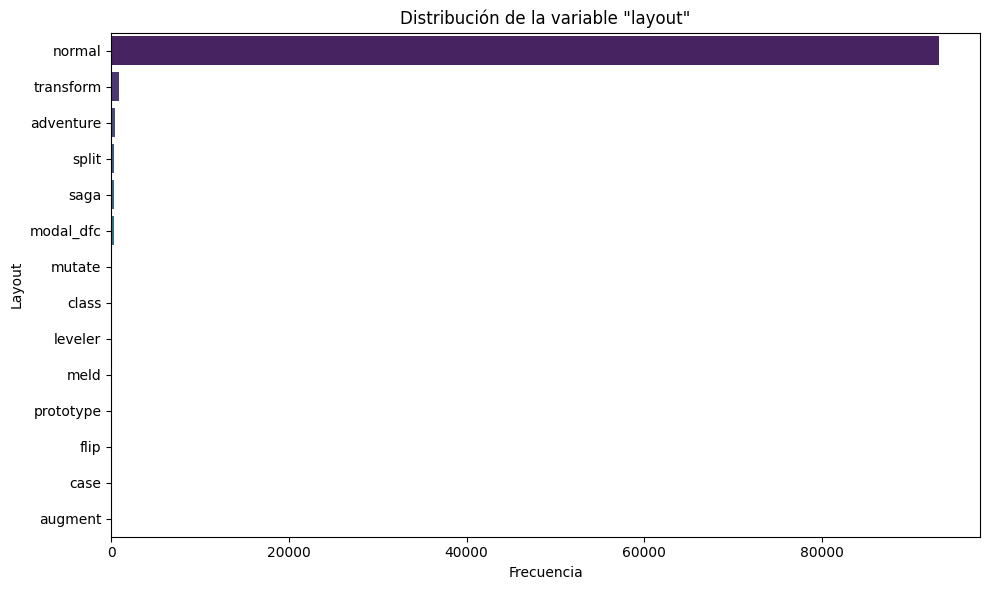

In [19]:
layout_counts = df['layout'].value_counts()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=layout_counts.values, y=layout_counts.index, palette='viridis')
plt.title('Distribución de la variable "layout"')
plt.xlabel('Frecuencia')
plt.ylabel('Layout')
plt.tight_layout()
plt.show()

In [20]:
#Casi todos son "normal", asi que vamos a garcharnos la columna
df.drop(columns="layout", axis=1, inplace=True)
df

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices,released_year
1,Fury Sliver,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006
2,Kor Outfitter,{W}{W},2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009
4,Siren Lookout,{2}{U},3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017
5,Web,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994
6,Wastewood Verge,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",...,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,{X}{X}{G}{U},2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024
106370,Horned Troll,{2}{G},3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003
106371,Faerie Bladecrafter,{2}{B},3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023
106372,Exultant Skymarcher,{1}{W}{W},3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018


## Ahora vamos con el mana_cost y cmc

In [21]:
df[df["mana_cost"].isnull()]

,name,mana_cost,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,...,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices,released_year
6,Wastewood Verge,NaN,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",...,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
34,Orzhov Guildgate,NaN,0.0,Land — Gate,This land enters tapped.\n{T}: Add {W} or {B}.,[],"['B', 'W']",[],"['B', 'W']","{'standard': 'legal', 'future': 'legal', 'hist...",...,False,False,common,False,True,NaN,NaN,1566.0,"{'usd': '0.10', 'usd_foil': '0.93', 'usd_etche...",2013
76,Invasion of Tolvada // The Broken Sky,NaN,5.0,Battle — Siege // Enchantment,NaN,NaN,"['B', 'W']",['Transform'],NaN,"{'standard': 'legal', 'future': 'legal', 'hist...",...,False,False,rare,False,True,NaN,NaN,7087.0,"{'usd': '0.35', 'usd_foil': '0.40', 'usd_etche...",2023
93,Thornwood Falls,NaN,0.0,Land,This land enters tapped.\nWhen this land enter...,[],"['G', 'U']",[],"['G', 'U']","{'standard': 'legal', 'future': 'legal', 'hist...",...,False,True,common,False,True,NaN,NaN,872.0,"{'usd': '0.12', 'usd_foil': '0.18', 'usd_etche...",2016
103,Eldrazi Temple,NaN,0.0,Land,{T}: Add {C}.\n{T}: Add {C}{C}. Spend this man...,[],[],[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,rare,False,False,NaN,NaN,1500.0,"{'usd': '86.78', 'usd_foil': '106.87', 'usd_et...",2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106290,Neglected Heirloom // Ashmouth Blade,NaN,1.0,Artifact — Equipment // Artifact — Equipment,NaN,NaN,[],"['Transform', 'Equip']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,uncommon,False,False,NaN,NaN,15007.0,"{'usd': None, 'usd_foil': None, 'usd_etched': ...",2023
106324,"Svogthos, the Restless Tomb",NaN,0.0,Land,"{T}: Add {C}.\n{3}{B}{G}: Until end of turn, t...",[],"['B', 'G']",[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,uncommon,False,False,NaN,NaN,9506.0,"{'usd': '0.39', 'usd_foil': None, 'usd_etched'...",2018
106331,Serpentine,NaN,0.0,Creature — Wurm,"Landfall — Whenever a land you control enters,...",['G'],['G'],"['Augment', 'Landfall']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",...,False,True,rare,False,False,+3,+3,NaN,"{'usd': None, 'usd_foil': '0.19', 'usd_etched'...",2022
106352,Unknown Shores,NaN,0.0,Land,"{T}: Add {C}.\n{1}, {T}: Add one mana of any c...",[],[],[],"['B', 'C', 'G', 'R', 'U', 'W']","{'standard': 'not_legal', 'future': 'not_legal...",...,False,False,common,False,True,NaN,NaN,6813.0,"{'usd': '0.05', 'usd_foil': '0.35', 'usd_etche...",2013


In [22]:
df["cmc"].isnull().sum()

0

In [23]:
#Vale, mana cost tiene nulos y está rleacionada con CMC, asi que vamos a quedarnos con cmc y mana_cost vamos a dropearla
df.drop(columns="mana_cost", axis=1, inplace=True)
df

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,promo,reprint,rarity,textless,booster,power,toughness,edhrec_rank,prices,released_year
1,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006
2,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009
4,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017
5,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,True,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994
6,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,True,True,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024
106370,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,True,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003
106371,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023
106372,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,False,False,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018


## Type Line, esta es jodida

In [24]:
#Tenemos un problema, y es que es un caos esta columna y pueden salir muchos valores, asi que vamos a simplemente
#separarla en tipos principales y luego hacer un one hot encoding con eso. Ya veremos luego qué hacemos

df["type_line"].isnull().sum()

0

In [25]:
# Aplicar la función al DataFrame
df[['type_main', 'type_sub']] = df['type_line'].apply(lambda x: pd.Series(func.split_type_line(x)))

In [26]:
df = df[~df["type_main"].str.contains("Hero", na=False)]

In [27]:
df

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,rarity,textless,booster,power,toughness,edhrec_rank,prices,released_year,type_main,type_sub
1,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,uncommon,False,True,3,3,9112.0,"{'usd': '0.37', 'usd_foil': '2.71', 'usd_etche...",2006,Creature,Sliver
2,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,common,False,True,2,2,18732.0,"{'usd': '0.15', 'usd_foil': '2.09', 'usd_etche...",2009,Creature,"Kor,Soldier"
4,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,common,False,True,1,2,17083.0,"{'usd': '0.02', 'usd_foil': '0.31', 'usd_etche...",2017,Creature,"Siren,Pirate"
5,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,rare,False,True,NaN,NaN,24568.0,"{'usd': '0.81', 'usd_foil': None, 'usd_etched'...",1994,Enchantment,Aura
6,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,rare,False,False,NaN,NaN,3988.0,"{'usd': '6.37', 'usd_foil': '6.89', 'usd_etche...",2025,Land,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106368,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,rare,False,False,NaN,NaN,6608.0,"{'usd': '0.13', 'usd_foil': None, 'usd_etched'...",2024,Sorcery,
106370,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,common,False,True,2,2,26694.0,"{'usd': '0.04', 'usd_foil': None, 'usd_etched'...",2003,Creature,Troll
106371,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,rare,False,False,2,2,5177.0,"{'usd': '2.45', 'usd_foil': None, 'usd_etched'...",2023,Creature,"Faerie,Rogue"
106372,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,common,False,True,2,3,22782.0,"{'usd': '0.07', 'usd_foil': '0.15', 'usd_etche...",2018,Creature,"Vampire,Soldier"


In [28]:
#Ahora vamos a intentar analizar los tipos y tal

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir por coma y aplanar la lista
all_main_types = df['type_main'].dropna().str.split(',').sum()

# Contar la frecuencia de cada tipo
type_counts = Counter(all_main_types)


In [29]:
type_counts

Counter({'Creature': 48297,
         'Legendary': 13055,
         'Artifact': 11360,
         'Instant': 11032,
         'Sorcery': 11012,
         'Enchantment': 10328,
         'Land': 7147,
         'Planeswalker': 1616,
         'Snow': 228,
         'Kindred': 156,
         'World': 62,
         'Battle': 55,
         'Dungeon': 4,
         'Elemental': 2,
         'Poly': 1,
         'instant': 1,
         'Universewalker': 1,
         'Scariest': 1,
         "You'll": 1,
         'Ever': 1,
         'See': 1})

In [31]:
def contains_invalid_type(types_str):
    invalid_types = {k for k, v in type_counts.items() if v <= 4}
    if pd.isna(types_str):
        return False
    types = types_str.split(',')
    return any(t in invalid_types for t in types)

# Paso 3: Filtrar el DataFrame eliminando las filas con al menos un tipo inválido
df = df[~df['type_main'].apply(contains_invalid_type)].reset_index(drop=True)

In [32]:
# Dividir por coma y aplanar la lista
all_main_types = df['type_main'].dropna().str.split(',').sum()

# Contar la frecuencia de cada tipo
type_counts = Counter(all_main_types)

C:\Users\Edurne\AppData\Local\Temp\ipykernel_8056\597795642.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Type', data=type_df, palette='mako')


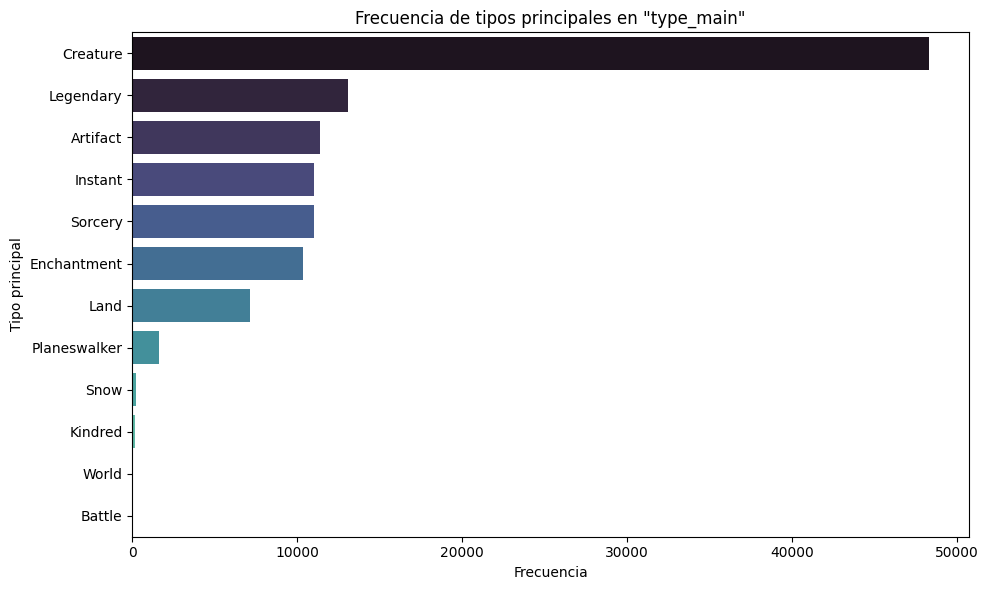

In [33]:
# Convertir a DataFrame para graficar
type_df = pd.DataFrame(type_counts.items(), columns=['Type', 'Count']).sort_values(by='Count', ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Type', data=type_df, palette='mako')
plt.title('Frecuencia de tipos principales en "type_main"')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo principal')
plt.tight_layout()
plt.show()

In [34]:
type_counts

Counter({'Creature': 48296,
         'Legendary': 13054,
         'Artifact': 11359,
         'Instant': 11030,
         'Sorcery': 11012,
         'Enchantment': 10328,
         'Land': 7147,
         'Planeswalker': 1616,
         'Snow': 228,
         'Kindred': 156,
         'World': 62,
         'Battle': 55})

In [35]:
# Crear one-hot encoding multietiqueta para 'type_main'
type_main_dummies = df['type_main'].str.get_dummies(sep=',')

# Unir al DataFrame original (opcional)
df = pd.concat([df, type_main_dummies], axis=1)
#De momento no las quito para tener información mientras hago la limpieza y mierdas
#df.drop(columns=["type_line", "type_main"], inplace=True)

df

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
0,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
1,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
2,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
3,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,1,0,0,0,0,0,0,0,0
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95788,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']","['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,0,0,0,0,0,0,0,1,0
95789,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
95790,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
95791,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0


## Vamos a colores, paso ahora del oracle text

In [36]:
df[df["colors"] == "[]"]

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,0,0,0,1,0,0,0,0,0
12,Bronze Horse,7.0,Artifact Creature — Horse,Trample\nAs long as you control another creatu...,[],[],['Trample'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
29,Orzhov Guildgate,0.0,Land — Gate,This land enters tapped.\n{T}: Add {W} or {B}.,[],"['B', 'W']",[],"['B', 'W']","{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,0,0,0,1,0,0,0,0,0
42,Crown of Gondor,3.0,Legendary Artifact — Equipment,Equipped creature gets +1/+1 for each creature...,[],[],['Equip'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,0,0,0,0,1,0,0,0,0
47,Mox Jet,0.0,Artifact,{T}: Add {B}.,[],['B'],[],['B'],"{'standard': 'not_legal', 'future': 'not_legal...",True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95773,Unknown Shores,0.0,Land,"{T}: Add {C}.\n{1}, {T}: Add one mana of any c...",[],[],[],"['B', 'C', 'G', 'R', 'U', 'W']","{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,0,0,0,1,0,0,0,0,0
95777,Sol Ring,1.0,Artifact,{T}: Add {C}{C}.,[],[],[],['C'],"{'standard': 'not_legal', 'future': 'not_legal...",False,...,0,0,0,0,0,0,0,0,0,0
95778,Evolving Wilds,0.0,Land,"{T}, Sacrifice this land: Search your library ...",[],[],[],NaN,"{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,0,0,0,1,0,0,0,0,0
95784,Hollow One,5.0,Artifact Creature — Golem,This spell costs {2} less to cast for each car...,[],[],['Cycling'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0


In [37]:
df["colors"].isnull().sum()

1211

In [38]:
df[df["colors"].isnull()]

,name,cmc,type_line,oracle_text,colors,color_identity,keywords,produced_mana,legalities,reserved,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
67,Invasion of Tolvada // The Broken Sky,5.0,Battle — Siege // Enchantment,NaN,NaN,"['B', 'W']",['Transform'],NaN,"{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,1,0,0,0,0,0,0,0,0
98,The Restoration of Eiganjo // Architect of Res...,3.0,Enchantment — Saga // Enchantment Creature — F...,NaN,NaN,['W'],"['Vigilance', 'Transform']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,1,0,0,0,0,0,0,0,0
115,"Growing Rites of Itlimoc // Itlimoc, Cradle of...",3.0,Legendary Enchantment // Legendary Land,NaN,NaN,['G'],['Transform'],['G'],"{'standard': 'legal', 'future': 'legal', 'hist...",False,...,0,1,0,0,1,1,0,0,0,0
142,"Shaile, Dean of Radiance // Embrose, Dean of S...",2.0,Legendary Creature — Bird Cleric // Legendary ...,NaN,NaN,"['B', 'W']","['Flying', 'Vigilance']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,1,0,0,0,0
223,"Nissa, Vastwood Seer // Nissa, Sage Animist",3.0,Legendary Creature — Elf Scout // Legendary Pl...,NaN,NaN,['G'],['Transform'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95515,Distracting Geist // Clever Distraction,3.0,Creature — Spirit // Enchantment — Aura,NaN,NaN,['W'],"['Transform', 'Enchant', 'Disturb']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,1,0,0,0,0,0,0,0,0
95572,"Dorothea, Vengeful Victim // Dorothea's Retrib...",2.0,Legendary Creature — Spirit // Enchantment — Aura,NaN,NaN,"['U', 'W']","['Flying', 'Transform', 'Enchant', 'Disturb']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,1,0,0,0,1,0,0,0,0
95662,Desperate Farmer // Depraved Harvester,3.0,Creature — Human Peasant // Creature — Human K...,NaN,NaN,['B'],"['Lifelink', 'Transform']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0
95709,Thing in the Ice // Awoken Horror,2.0,Creature — Horror // Creature — Kraken Horror,NaN,NaN,['U'],"['Transform', 'Defender']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,...,1,0,0,0,0,0,0,0,0,0


In [39]:
df["color_identity"].isnull().sum()

0

In [40]:
#Voy a directamente dropear la de Colors y me voy a quedar con Color identity.
df.drop(columns="colors", axis=1, inplace= True)
#Ahora toca trabajarla

In [41]:
# import ast

# # Convertir string a lista real si es necesario, luego unir por comas
# df['color_identity_clean'] = df['color_identity'].apply(
#     lambda x: ','.join(ast.literal_eval(x)) if isinstance(x, str) else ','.join(x)
# )

df

,name,cmc,type_line,oracle_text,color_identity,keywords,produced_mana,legalities,reserved,game_changer,...,Creature,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World
0,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
1,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
2,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
3,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,1,0,0,0,0,0,0,0,0
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95788,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,1,0
95789,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
95790,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0
95791,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,0


In [42]:
import ast

df['color_identity_clean'] = df['color_identity'].apply(func.clean_color_identity)

In [43]:
df

,name,cmc,type_line,oracle_text,color_identity,keywords,produced_mana,legalities,reserved,game_changer,...,Enchantment,Instant,Kindred,Land,Legendary,Planeswalker,Snow,Sorcery,World,color_identity_clean
0,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,['R'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,R
1,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",['W'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,W
2,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...",['U'],"['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,U
3,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['G'],['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,1,0,0,0,0,0,0,0,0,G
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,"['B', 'G']",[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,...,0,0,0,1,0,0,0,0,0,"B,G"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95788,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,"['G', 'U']",['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,1,0,"G,U"
95789,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,['G'],[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,G
95790,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['B'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,B
95791,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['W'],['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,...,0,0,0,0,0,0,0,0,0,W


In [44]:
# One-hot encoding multietiqueta separando por comas
color_dummies = df['color_identity_clean'].str.get_dummies(sep=',')

# Eliminar la columna '.i' para que incoloro quede implícito
if '.i' in color_dummies.columns:
    color_dummies.drop(columns=['.i'], inplace=True)

# Añadir al DataFrame
df = pd.concat([df, color_dummies], axis=1)

# Eliminar la columna original
df.drop(columns=['color_identity', 'color_identity_clean'], inplace=True)

df

,name,cmc,type_line,oracle_text,keywords,produced_mana,legalities,reserved,game_changer,foil,...,Legendary,Planeswalker,Snow,Sorcery,World,B,G,R,U,W
0,Fury Sliver,6.0,Creature — Sliver,All Sliver creatures have double strike.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,Kor Outfitter,2.0,Creature — Kor Soldier,"When this creature enters, you may attach targ...",[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,1
2,Siren Lookout,3.0,Creature — Siren Pirate,"Flying\nWhen this creature enters, it explores...","['Flying', 'Explore']",NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,1,0
3,Web,1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,['Enchant'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,1,0,0,0
4,Wastewood Verge,0.0,Land,{T}: Add {G}.\n{T}: Add {B}. Activate only if ...,[],"['B', 'G']","{'standard': 'legal', 'future': 'legal', 'hist...",False,False,True,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95788,Aggressive Biomancy,2.0,Sorcery,Create X tokens that are copies of target crea...,['Fight'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,1,0,0,1,0,1,0
95789,Horned Troll,3.0,Creature — Troll,{G}: Regenerate this creature.,[],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,0,1,0,0,0
95790,Faerie Bladecrafter,3.0,Creature — Faerie Rogue,Flying\nWhenever one or more Faeries you contr...,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,False,...,0,0,0,0,0,1,0,0,0,0
95791,Exultant Skymarcher,3.0,Creature — Vampire Soldier,Flying,['Flying'],NaN,"{'standard': 'not_legal', 'future': 'not_legal...",False,False,True,...,0,0,0,0,0,0,0,0,0,1


In [47]:
# Seleccionar solo las columnas de colores (asumiendo que son letras mayúsculas únicas)
color_columns = ['W', 'U', 'B', 'R', 'G']  # Asegúrate de que estos son los nombres que quedaron

# Calcular porcentaje de presencia de cada color
color_percentages = df[color_columns].mean().sort_values(ascending=False) * 100

# Mostrar los porcentajes
print(color_percentages)

# Filas donde todos los colores son 0 ⇒ incoloro
num_colorless = (df[color_columns].sum(axis=1) == 0).sum()

# Porcentaje
percent_colorless = num_colorless / len(df) * 100

print(f"Cartas incoloras: {num_colorless} ({percent_colorless:.2f}%)")


G    22.793941
B    22.659276
W    22.521479
U    22.420219
R    22.375330
dtype: float64
Cartas incoloras: 10501 (10.96%)


## Vamos a ir a hacer Legalities

## Keywords

In [ ]:
## Creo que la solución va a ser identificar cuáles son de evasión y pasar a poner si tienen evasión o no. O directamente
## contar cuantas keywords tiene que igual eso sí que tiene más peso.